### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [2]:
data = pd.read_csv('vehicle.csv').dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

In [3]:
data.describe().T

count        mean         std    min    25%  \
compactness                  813.0   93.656827    8.233751   73.0   87.0   
circularity                  813.0   44.803198    6.146659   33.0   40.0   
distance_circularity         813.0   82.043050   15.783070   40.0   70.0   
radius_ratio                 813.0  169.098401   33.615402  104.0  141.0   
pr.axis_aspect_ratio         813.0   61.774908    7.973000   47.0   57.0   
max.length_aspect_ratio      813.0    8.599016    4.677174    2.0    7.0   
scatter_ratio                813.0  168.563346   33.082186  112.0  146.0   
elongatedness                813.0   40.988930    7.803380   26.0   33.0   
pr.axis_rectangularity       813.0   20.558426    2.573184   17.0   19.0   
max.length_rectangularity    813.0  147.891759   14.504648  118.0  137.0   
scaled_variance              813.0  188.377614   31.165873  130.0  167.0   
scaled_variance.1            813.0  438.382534  175.270368  184.0  318.0   
scaled_radius_of_gyration    813.0  174.252153   32.332161  109.0  149.0   
scaled_radius_of_gyration.1  813.0   72.399754    7.475994   59.0   67.0   
skewness_about               813.0    6.351784    4.921476    0.0    2.0   
skewness_about.1             813.0   12.687577    8.926951    0.0    6.0   
skewness_about.2             813.0  188.979090    6.153681  176.0  184.0   
hollows_ratio                813.0  195.729397    7.398781  181.0  191.0   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          79.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            364.0  586.0  1018.0  
scaled_radius_of_gyration    173.0  198.0   268.0  
scaled_radius_of_gyration.1   71.0   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             189.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

Inferences:
* The data has 813 rows and 19 columns
* The mean values implies that the values are not of same scale/range
* distance circularity, radius ratio, elongatedness, scaled radius of gyration, scaled radius of gyration.1, hollows ratio are slightly left skewed since the mean is less than the median value
* scatter ratio, scaled_variance, scaled variance.1 are heavily right skewed

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [4]:
counts = data['class'].value_counts()
counts

car    413
bus    205
van    195
Name: class, dtype: int64

### Check for any missing values in the data 

In [5]:
data.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [6]:
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
data['class'] =le.fit_transform(data['class'])
data['class'].value_counts()
# data.info()

1    413
0    205
2    195
Name: class, dtype: int64

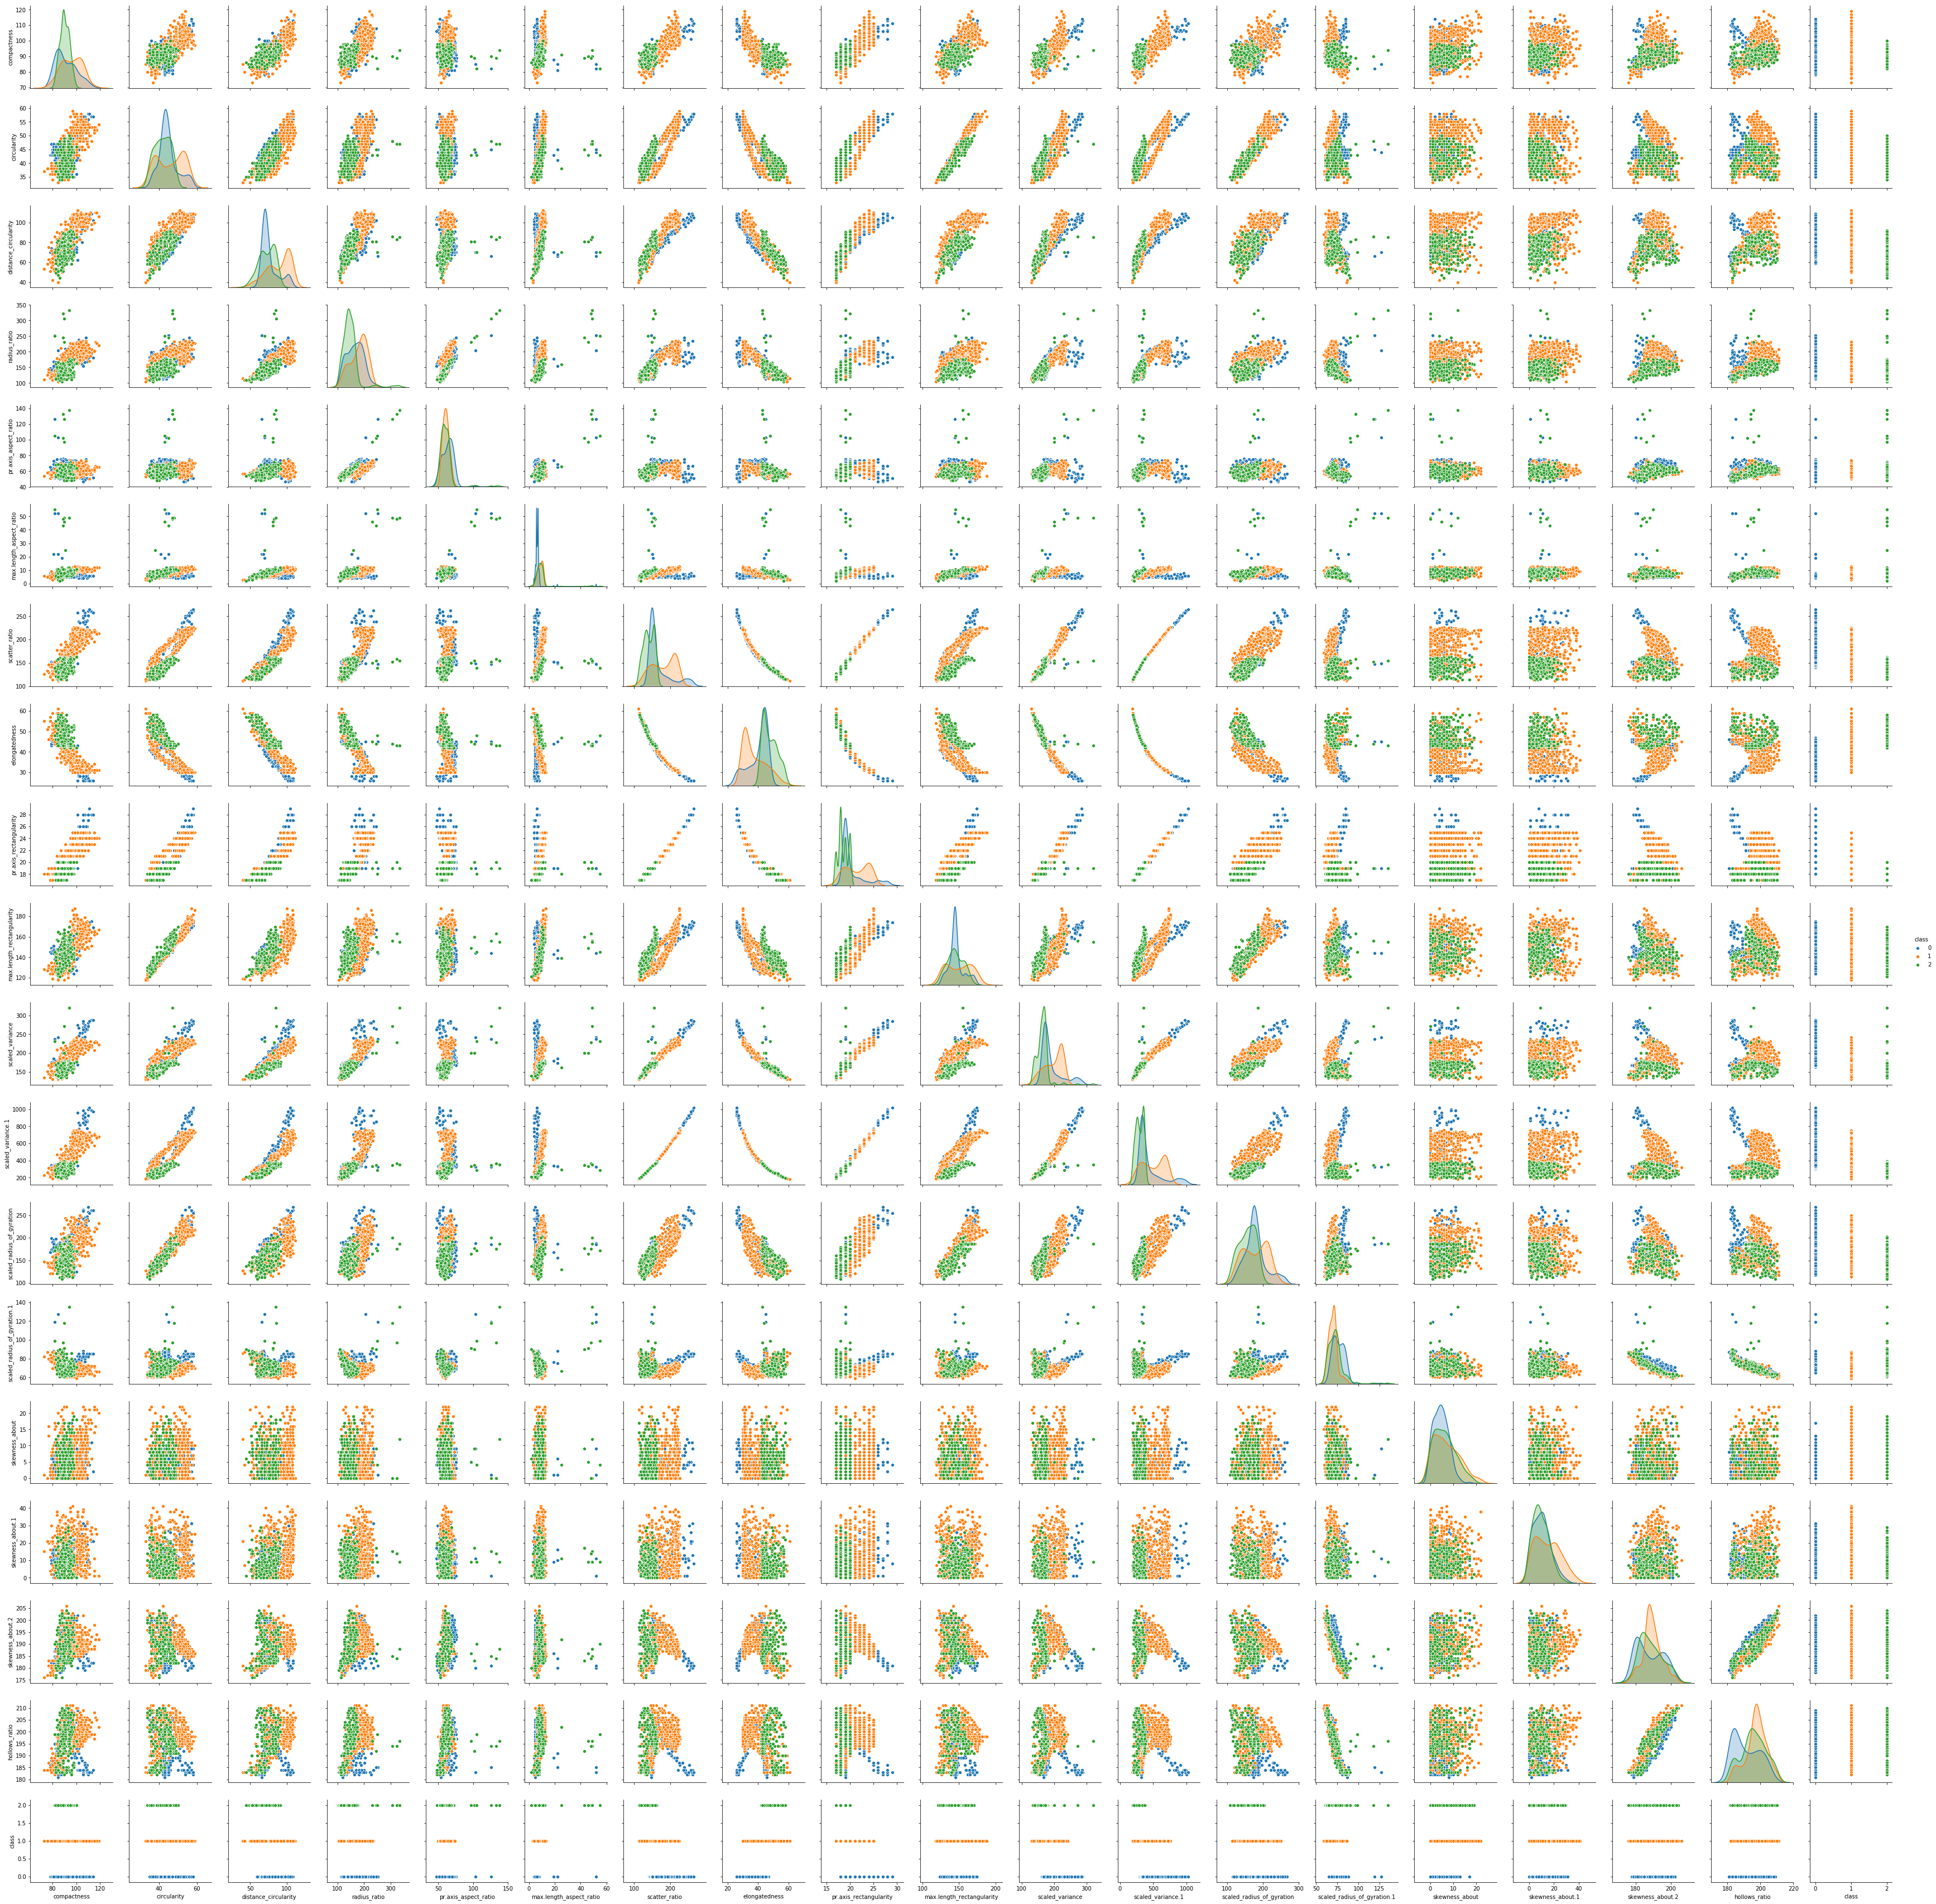

In [8]:
sns.pairplot(data=data, hue='class')

In [9]:
data.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.689885              0.789955   
circularity                     0.689885     1.000000              0.797704   
distance_circularity            0.789955     0.797704              1.000000   
radius_ratio                    0.688130     0.623950              0.771404   
pr.axis_aspect_ratio            0.090557     0.155023              0.163386   
max.length_aspect_ratio         0.150369     0.251619              0.265591   
scatter_ratio                   0.814026     0.858149              0.909023   
elongatedness                  -0.788051    -0.825108             -0.912713   
pr.axis_rectangularity          0.814227     0.856137              0.897261   
max.length_rectangularity       0.674902     0.965366              0.773459   
scaled_variance                 0.764386     0.806108              0.865683   
scaled_variance.1               0.820240     0.850932              0.891789   
scaled_radius_of_gyration       0.581405     0.935594              0.705689   
scaled_radius_of_gyration.1    -0.258437     0.049070             -0.238145   
skewness_about                  0.231648     0.141726              0.110280   
skewness_about.1                0.168384    -0.001975              0.277851   
skewness_about.2                0.296195    -0.113902              0.145258   
hollows_ratio                   0.372806     0.049331              0.343228   
class                          -0.037391    -0.161018             -0.067445   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.688130              0.090557   
circularity                      0.623950              0.155023   
distance_circularity             0.771404              0.163386   
radius_ratio                     1.000000              0.667375   
pr.axis_aspect_ratio             0.667375              1.000000   
max.length_aspect_ratio          0.452460              0.652093   
scatter_ratio                    0.743470              0.113696   
elongatedness                   -0.795761             -0.191193   
pr.axis_rectangularity           0.716210              0.086992   
max.length_rectangularity        0.570478              0.133553   
scaled_variance                  0.806788              0.290375   
scaled_variance.1                0.731773              0.100668   
scaled_radius_of_gyration        0.544636              0.135663   
scaled_radius_of_gyration.1     -0.175348              0.173060   
skewness_about                   0.044693             -0.059244   
skewness_about.1                 0.178079             -0.040769   
skewness_about.2                 0.375591              0.229702   
hollows_ratio                    0.470895              0.257566   
class                           -0.199219             -0.114292   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.150369       0.814026   
circularity                                 0.251619       0.858149   
distance_circularity                        0.265591       0.909023   
radius_ratio                                0.452460       0.743470   
pr.axis_aspect_ratio                        0.652093       0.113696   
max.length_aspect_ratio                     1.000000       0.171445   
scatter_ratio                               0.171445       1.000000   
elongatedness                              -0.183242      -0.973413   
pr.axis_rectangularity                      0.167514       0.991992   
max.length_rectangularity                   0.309180       0.808154   
scaled_variance                             0.331124       0.950067   
scaled_variance.1                           0.150069       0.996396   
scaled_radius_of_gyration                   0.197179       0.795748   
scaled_radius_of_gyration.1                 0.308329      -0.045632   
skewness_about                            

In [10]:
data_std = data.drop('class', axis=1).apply(zscore)
data_std.info()
data_std.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 18 columns):
compactness                    813 non-null float64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null float64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null float64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_rat

compactness   circularity  distance_circularity  radius_ratio  \
count  8.130000e+02  8.130000e+02          8.130000e+02  8.130000e+02   
mean  -2.425284e-16 -4.642999e-16         -2.351542e-16  3.665238e-16   
std    1.000616e+00  1.000616e+00          1.000616e+00  1.000616e+00   
min   -2.510344e+00 -1.921444e+00         -2.665447e+00 -1.937757e+00   
25%   -8.089782e-01 -7.819133e-01         -7.635057e-01 -8.363933e-01   
50%   -7.982157e-02 -1.307527e-01         -1.929234e-01 -6.246222e-02   
75%    7.708611e-01  6.831980e-01          1.011639e+00  7.710020e-01   
max    3.079857e+00  2.311100e+00          1.899212e+00  4.878790e+00   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count          8.130000e+02             8.130000e+02   8.130000e+02   
mean          -2.047016e-16            -1.349201e-16   3.714399e-16   
std            1.000616e+00             1.000616e+00   1.000616e+00   
min           -1.854258e+00            -1.411767e+00  -1.710835e+00   
25%           -5.992534e-01            -3.420870e-01  -6.824590e-01   
50%           -9.725132e-02            -1.281510e-01  -3.497491e-01   
75%            4.047507e-01             2.997208e-01   8.903515e-01   
max            9.566288e+00             9.926837e+00   2.916857e+00   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count   8.130000e+02            8.130000e+02               8.130000e+02   
mean   -2.062038e-16           -2.651972e-16              -7.398756e-16   
std     1.000616e+00            1.000616e+00               1.000616e+00   
min    -1.922008e+00           -1.383740e+00              -2.062109e+00   
25%    -1.024408e+00           -6.060138e-01              -7.513773e-01   
50%     2.578765e-01           -2.171510e-01              -1.305046e-01   
75%     6.425619e-01            9.494376e-01               7.663115e-01   
max     2.565989e+00            3.282615e+00               2.766901e+00   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count     8.130000e+02       8.130000e+02               8.130000e+02   
mean     -3.031605e-17      -3.550529e-17               3.348422e-16   
std       1.000616e+00       1.000616e+00               1.000616e+00   
min      -1.874279e+00      -1.452266e+00              -2.019423e+00   
25%      -6.863524e-01      -6.872619e-01              -7.815035e-01   
50%      -3.010789e-01      -4.246486e-01              -3.875161e-02   
75%       9.189540e-01       8.427456e-01               7.349483e-01   
max       4.225885e+00       3.309026e+00               2.901308e+00   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                 8.130000e+02    8.130000e+02      8.130000e+02   
mean                  1.312159e-16   -1.693329e-17      9.845889e-17   
std                   1.000616e+00    1.000616e+00      1.000616e+00   
min                  -1.793474e+00   -1.291420e+00     -1.422141e+00   
25%                  -7.227236e-01   -8.847879e-01     -7.496057e-01   
50%                  -1.873484e-01   -7.152328e-02     -1.891593e-01   
75%                   3.480268e-01    5.384252e-01      7.075550e-01   
max                   8.378655e+00    3.181535e+00      3.173519e+00   

       skewness_about.2  hollows_ratio  
count      8.130000e+02   8.130000e+02  
mean      -1.169490e-15   3.482249e-16  
std        1.000616e+00   1.000616e+00  
min       -2.110457e+00  -1.992013e+00  
25%       -8.096219e-01  -6.396066e-01  
50%        3.400092e-03   1.718371e-01  
75%        6.538177e-01   7.127995e-01  
max        2.767675e+00   2.065206e+00

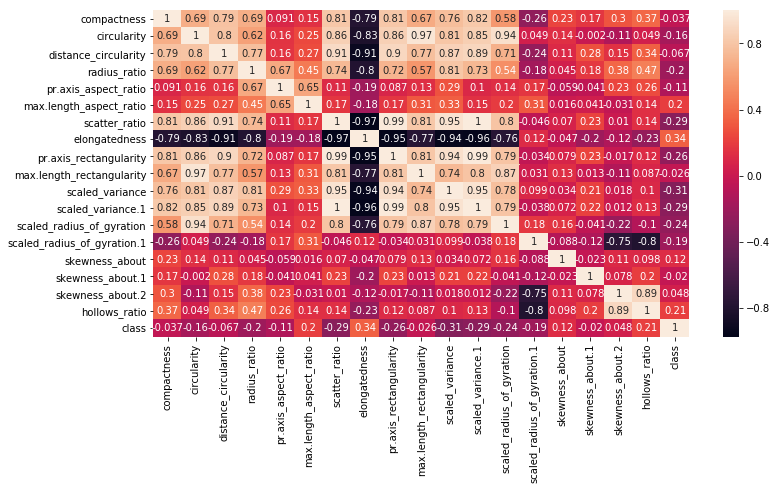

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(data=data.corr(), annot=True)

> From the correlation matrix removing the columns with lowest correlation with the class column

In [12]:
columns=['compactness', 'distance_circularity', 'max.length_rectangularity', 'skewness_about.1', 'skewness_about.2']

for v in columns:
    data_std.drop(v, axis=1, inplace=True)

### K - Means Clustering

### 4. Assign a dummy array called distortion

In [13]:
distortion = []

You can later use this array to plot the elbow plot

### 5. Calculating distortion - C distance

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

In [14]:
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from scipy.spatial import distance

In [15]:
cluster_range = range( 1, 10)   # Provided above
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters, n_init = 5)
    clusters.fit(data_std)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append( clusters.inertia_ )
    distortion.append(sum(np.min(distance.cdist(data_std, clusters.cluster_centers_, 'euclidean'), axis=1))/ data_std.shape[0])
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df

num_clusters  cluster_errors
0             1    10569.000000
1             2     6041.190252
2             3     4777.558377
3             4     3770.814634
4             5     3367.537879
5             6     3036.958943
6             7     2820.460589
7             8     2498.613953
8             9     2313.767349

### 6. Plotting Elbow/ Scree Plot

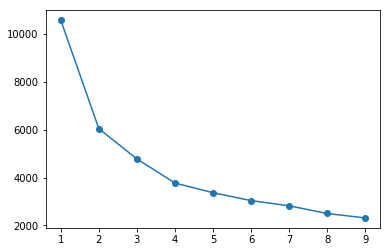

In [16]:
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

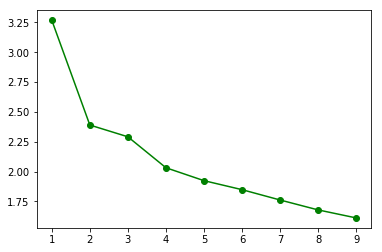

In [17]:
plt.plot(range(1,10), distortion, 'go-')

### Find out the optimal value of K

> __From the above plots we can find that the optimal number of k is 3__

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [18]:
# cluster = KMeans( n_clusters = 3, random_state = 2354 )
# cluster.fit(data_std)
# data_std_copy = data_std.copy(deep = True)

kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(data_std)
labels = kmeans.predict(data_std)
centroids = kmeans.cluster_centers_
print("Centroid values")
print(centroids) # From sci-kit learn

Centroid values
[[-5.87063176e-01 -5.58363216e-01 -1.66120623e-01 -2.35323521e-01
  -6.44578752e-01  6.16818172e-01 -6.45420583e-01 -6.35461463e-01
  -6.46807759e-01 -5.41375469e-01  8.17103900e-03 -7.46332744e-02
  -1.22951239e-01]
 [ 1.08670979e+00  9.51923743e-01  1.14141386e-01  1.89718288e-01
   1.21061969e+00 -1.15718399e+00  1.21281636e+00  1.13037632e+00
   1.21625888e+00  9.98006253e-01 -1.56023261e-01  1.46212475e-01
   2.40896112e-01]
 [ 7.27349604e-02  2.94768327e+00  6.83665190e+00  8.69670551e+00
  -5.35008001e-01  4.66247771e-01 -5.57405972e-01  1.69752769e+00
  -5.88068272e-01  2.12700856e-01  4.96563826e+00 -2.74839440e-01
  -4.53650721e-01]]


You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [19]:
colnames = [x for x in data.columns if x not in columns]
colnames.remove('class')
prediction= kmeans.predict(data_std)
centroid_df = pd.DataFrame(centroids, columns = colnames )
# data_df = pd.DataFrame(data_std, columns= colnames)
# data_df["group"] = prediction


# data_df.sample(15)
centroid_df

circularity  radius_ratio  pr.axis_aspect_ratio  max.length_aspect_ratio  \
0    -0.587063     -0.558363             -0.166121                -0.235324   
1     1.086710      0.951924              0.114141                 0.189718   
2     0.072735      2.947683              6.836652                 8.696706   

   scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
0      -0.644579       0.616818               -0.645421        -0.635461   
1       1.210620      -1.157184                1.212816         1.130376   
2      -0.535008       0.466248               -0.557406         1.697528   

   scaled_variance.1  scaled_radius_of_gyration  scaled_radius_of_gyration.1  \
0          -0.646808                  -0.541375                     0.008171   
1           1.216259                   0.998006                    -0.156023   
2          -0.588068                   0.212701                     4.965638   

   skewness_about  hollows_ratio  
0       -0.074633      -0.122951  
1        0.146212       0.240896  
2       -0.274839      -0.453651

Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [20]:
prediction

array([0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [21]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

### 9. Combine all three arrays a,b,c into a dataframe

In [22]:
df=pd.DataFrame(np.concatenate([a,b,c]), columns=['c1', 'c2'])
df.sample(15)

c1         c2
209  12.769910  21.004561
42   10.448079   1.075680
200  10.870935  20.939626
204  12.351573  21.511496
50   11.603908   0.682207
158  10.290208  20.975100
193   8.132589  17.530426
208   9.062841  17.030470
86   11.000533  -1.105011
176   9.283951  18.521651
197   8.697306  19.761594
19   10.277494  -0.681344
79   12.127727  -2.406657
0    10.859603   1.417288
178   8.811749  18.507038

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
c1    250 non-null float64
c2    250 non-null float64
dtypes: float64(2)
memory usage: 4.0 KB


### 10. Use scatter matrix to print all the 3 distributions

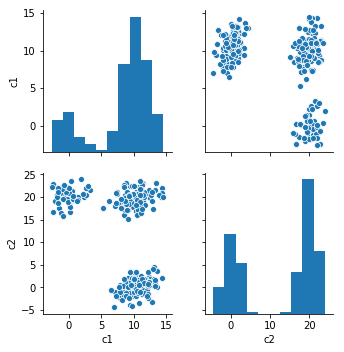

In [24]:
sns.pairplot(df)

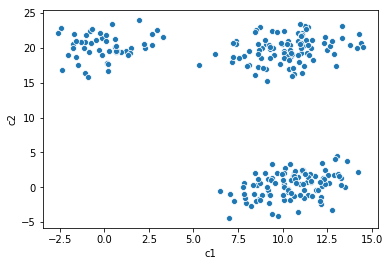

In [25]:
sns.scatterplot(x=df['c1'], y=df['c2'])

### 11. Find out the linkage matrix

Use ward as linkage metric and distance as Eucledian

In [26]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

In [27]:
links = linkage(df, method='ward', metric='euclidean')
links.shape

(249, 4)

In [28]:
links

array([[1.55000000e+02, 1.70000000e+02, 5.46473686e-02, 2.00000000e+00],
       [1.40000000e+01, 4.10000000e+01, 6.64805377e-02, 2.00000000e+00],
       [1.77000000e+02, 1.98000000e+02, 6.73509149e-02, 2.00000000e+00],
       [6.00000000e+00, 6.50000000e+01, 6.88800825e-02, 2.00000000e+00],
       [1.86000000e+02, 2.36000000e+02, 6.89391055e-02, 2.00000000e+00],
       [2.17000000e+02, 2.54000000e+02, 9.51261268e-02, 3.00000000e+00],
       [6.10000000e+01, 9.20000000e+01, 1.05748723e-01, 2.00000000e+00],
       [1.57000000e+02, 2.02000000e+02, 1.06766136e-01, 2.00000000e+00],
       [1.29000000e+02, 1.31000000e+02, 1.12139112e-01, 2.00000000e+00],
       [1.90000000e+02, 1.94000000e+02, 1.18424682e-01, 2.00000000e+00],
       [4.00000000e+00, 7.00000000e+01, 1.22164550e-01, 2.00000000e+00],
       [2.43000000e+02, 2.44000000e+02, 1.33585072e-01, 2.00000000e+00],
       [2.18000000e+02, 2.30000000e+02, 1.35704262e-01, 2.00000000e+00],
       [2.06000000e+02, 2.35000000e+02, 1.37480470e

### 12. Plot the dendrogram for the consolidated dataframe

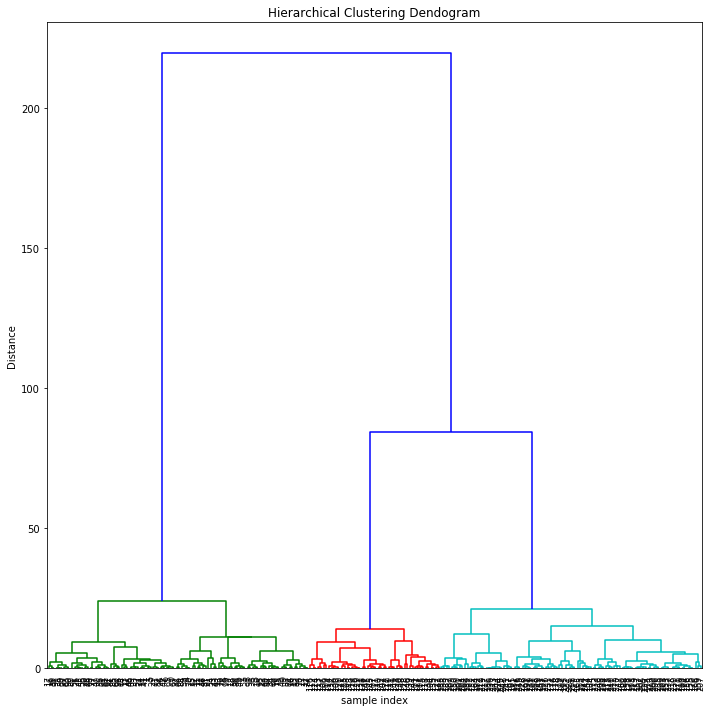

In [29]:
plt.figure(figsize=(10, 10))
plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(links, leaf_rotation=90,color_threshold=50, leaf_font_size=8)
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

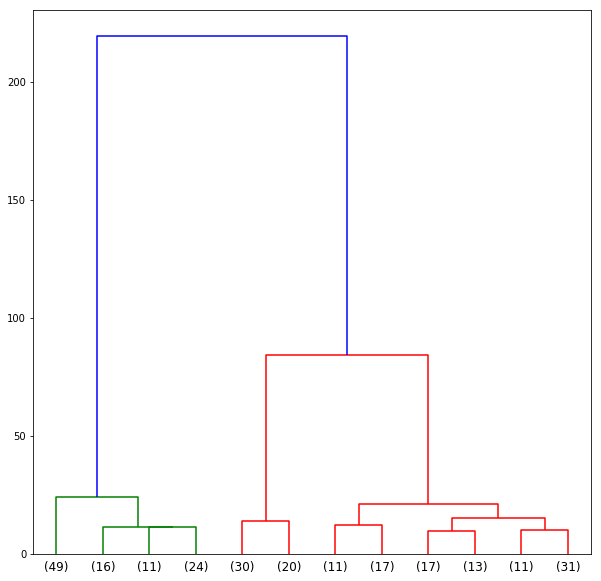

In [30]:
plt.figure(figsize=(10,10))
dendrogram(links,truncate_mode='lastp', p=12)
plt.show()

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

> From the truncated dendrogram we can see that the distance value can be between approximately 30 to 70. hence considering a value in between 30 and 70 distance = 40

In [31]:
import scipy.cluster.hierarchy as hier

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [32]:
array = hier.fcluster(links, t=40, criterion='distance')
array

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

### Use matplotlib to visually observe the clusters in 2D space 

> Adding the fcluster values to the dataframe as a new column and then plotting the scatter matrix or pair plot

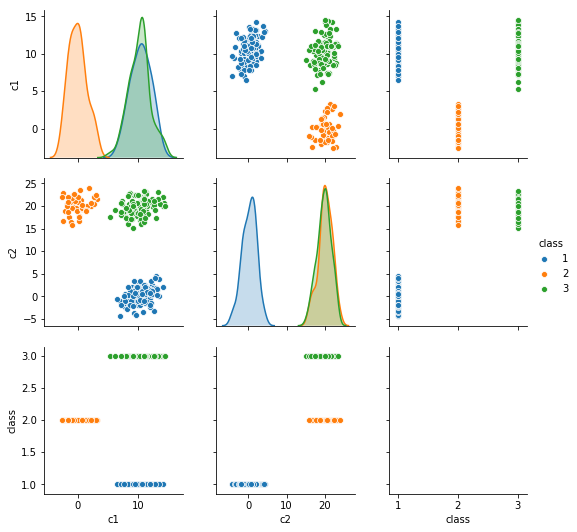

In [33]:
df['class'] = array
sns.pairplot(df, hue='class')

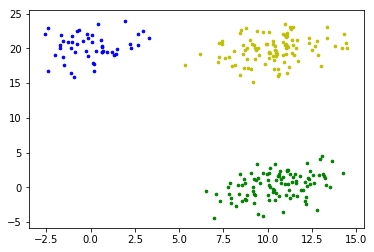

In [35]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
c = np.array([3,3])

for i in df['class'].unique():
    points = np.array(df.loc[df['class'] == i])
    #c[i] = np.mean(points, axis=0)
    ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])